<a href="https://colab.research.google.com/github/Komkar123567/AIML--training_Omkar/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
# Importing some pytorch packages
import torch
from torch.nn import Conv2d



In [2]:
def apply_conv(image, kernel, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER from Pytorch--------
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input.float())
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

In [4]:
# Our  image
image = cv2.imread('/grid1_1(1).jpg', 0)
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

out2 = apply_conv(image, filter, padding=0, stride=1)


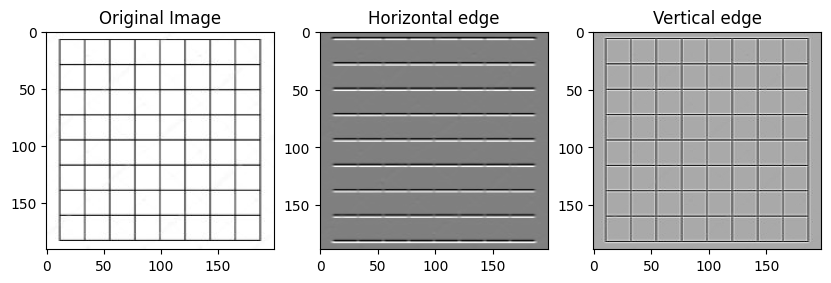

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,3,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,3,2)
ax.set_title('Horizontal edge')
ax.imshow(out1, cmap='gray')
ax = fig.add_subplot(1,3,3)
ax.imshow(out2, cmap='gray')
ax.set_title('Vertical edge')
plt.show()


In [7]:
## mean filteror average filter
image = cv2.imread('/grid1_1(1).jpg', 0)
filter = np.array([[1/9,1/9,1/9],
                   [ 1/9,1/9,1/9],
                   [ 1/9,1/9,1/9]])

out1 = apply_conv(image, filter, padding=0, stride=1)

filter = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

out2 = apply_conv(image, filter, padding=0, stride=1)


In [10]:
## Diagonal filter
image = cv2.imread('/diag_img.jpg', 0)
filter = np.array([[2,1,0],
                   [ 1,0,-1],
                   [ 0,-1,-2]])

out1 = apply_conv(image, filter, padding=0, stride=1)




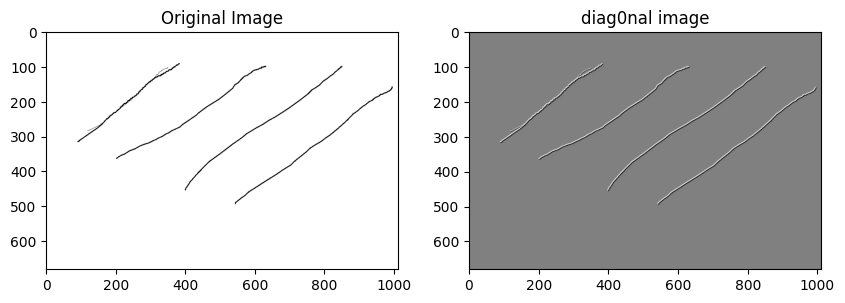

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,2,1)
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax = fig.add_subplot(1,2,2)
ax.set_title('diag0nal image')
ax.imshow(out1, cmap='gray')
plt.show()
